In [148]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import joypy

In [149]:
def lighten_color(color, amount=0.3):
        """
        Lightens the given color by multiplying (1-luminosity) by the given amount.
        Input can be matplotlib color string, hex string, or RGB tuple.

        Examples:
        >> lighten_color('g', 0.3)
        >> lighten_color('#F034A3', 0.6)
        >> lighten_color((.3,.55,.1), 0.5)
        """
        import matplotlib.colors as mc
        import colorsys
        try:
            c = mc.cnames[color]
        except:
            c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
        return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [150]:
#aesthetics for plots:
font = {'family' : 'arial',
        'size'   : 12}
mpl.rc('font', **font)

In [151]:
#dt = pd.read_csv('DREAMtoMD.DT.20190211-DREAMing_well_melt_temps_raw.input2bg.csv')
dt = pd.read_csv('validationSet_normalized_readCounts.csv', index_col=0)

In [152]:
dt

,ESCP-P003,FOXX-P003,DJNG-P002,MUZP-P001,FELD-P003,DJNG-P001,MUZP-P002,DUFF-P001,MUZP-P003,ASCS-P003,...,100292,102760,106126,103197,106133,100250,102598,100662,102795,102126
0.00,1970.0,11822.5,6812.5,1759.523810,2077.5,2569.135802,2305.0,108.333333,2212.5,1360.0,...,48504.938272,2195.3125,1111.320755,9109.345794,3626.5625,9122.857143,5582.500,1037.500000,788.235294,992.1875
0.07,0.0,7.5,10.0,13.095238,30.0,6.172840,22.5,0.000000,22.5,5.0,...,0.000000,3.1250,3.773585,9.345794,6.2500,5.714286,11.875,15.277778,0.000000,15.6250
0.14,0.0,12.5,2.5,1.190476,5.0,1.234568,10.0,2.083333,7.5,2.5,...,22.222222,1.5625,0.000000,11.214953,6.2500,9.523810,3.125,0.000000,0.000000,0.0000
0.21,0.0,5.0,2.5,1.190476,0.0,0.000000,2.5,0.000000,2.5,2.5,...,6.172840,0.0000,0.000000,2.803738,0.0000,1.904762,1.875,0.000000,0.000000,0.0000
0.28,0.0,2.5,0.0,1.190476,0.0,0.000000,2.5,0.000000,2.5,0.0,...,3.703704,0.0000,0.000000,0.000000,0.0000,1.904762,0.625,1.388889,0.000000,0.0000
0.35,2.5,7.5,2.5,2.380952,2.5,3.703704,5.0,2.083333,7.5,2.5,...,1.234568,0.0000,0.000000,0.000000,0.0000,1.904762,1.875,0.000000,0.000000,1.5625
0.42,0.0,2.5,2.5,0.000000,0.0,1.234568,0.0,0.000000,7.5,2.5,...,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.625,0.000000,0.000000,0.0000
0.49,0.0,0.0,0.0,0.000000,2.5,1.234568,0.0,0.000000,2.5,0.0,...,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.0000
0.56,0.0,2.5,0.0,2.380952,5.0,0.000000,0.0,0.000000,5.0,0.0,...,1.234568,0.0000,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,1.960784,0.0000
0.63,0.0,0.0,2.5,1.190476,2.5,1.234568,5.0,0.000000,0.0,2.5,...,0.000000,0.0000,0.000000,0.000000,0.0000,0.952381,0.000,0.000000,0.000000,1.5625


In [162]:
# need to transform each column a list of MD occurances

hist_dt = pd.DataFrame()
for column in dt.columns:
    casevals = dt.iloc[:,:][column]
    adjust = int(round(10.0/np.min([i for i in casevals.values if i != 0.0])+1))
    caseDistr = []
    for loc, val in enumerate(casevals):
        caseDistr += int(val*adjust) * \
        [float(casevals.index[loc])]
    df = pd.DataFrame({column:caseDistr})
    
    hist_dt = pd.concat([hist_dt,df], ignore_index=True, axis=1)

hist_dt.columns = dt.columns
hist_dt

,100442,102199,100292,102760,106126,103197,106133,100250,102598,100662,102795,102126
0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
436870,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436871,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436872,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436873,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
for column in hist_dt.columns:
    print(column)
    print(np.unique(hist_dt[column].dropna()))

ESCP-P003
[0.   0.35]
FOXX-P003
[0.   0.07 0.14 0.21 0.28 0.35 0.42 0.56 0.7  0.77]
DJNG-P002
[0.   0.07 0.14 0.21 0.35 0.42 0.63 0.7  0.77 0.84 0.91 1.  ]
MUZP-P001
[0.   0.07 0.14 0.21 0.28 0.35 0.56 0.63 0.84 0.91 1.  ]
FELD-P003
[0.   0.07 0.14 0.35 0.49 0.56 0.63 0.84]
DJNG-P001
[0.   0.07 0.14 0.35 0.42 0.49 0.63 0.7  0.84 0.91 1.  ]
MUZP-P002
[0.   0.07 0.14 0.21 0.28 0.35 0.63 0.77 0.84 1.  ]
DUFF-P001
[0.   0.14 0.35]
MUZP-P003
[0.   0.07 0.14 0.21 0.28 0.35 0.42 0.49 0.56 0.7  0.77 0.84 0.91]
ASCS-P003
[0.   0.07 0.14 0.21 0.35 0.42 0.63 0.91 1.  ]
DUFF-P002
[0.   0.07 0.21 0.56 0.77 0.84]
FELD-P002
[0.   0.07 0.14 0.21 0.35 0.42 0.49 0.56 0.7  0.77 0.84]
DJNG-P003
[0.   0.07 0.14 0.21 0.35 0.42 0.56 0.77 0.84]
VCTD-P001
[0.   0.07 0.14 0.7  0.77 0.91 1.  ]
VCTD-P002
[0.   0.07 0.21 0.28 0.35 0.42 0.56 0.63 0.7  0.77 0.84 0.91]
FELD-P001
[0.   0.07 0.14 0.28 0.49 0.56 0.63 0.7  0.77 0.84 0.91]
ASCS-P002
[0.   0.07 0.14 0.21 0.28 0.35 0.42 0.56 0.7  0.77 0.84 0.91 1.  ]
ASCS-P

Text(0.5, 88.0, 'Methylation Density')

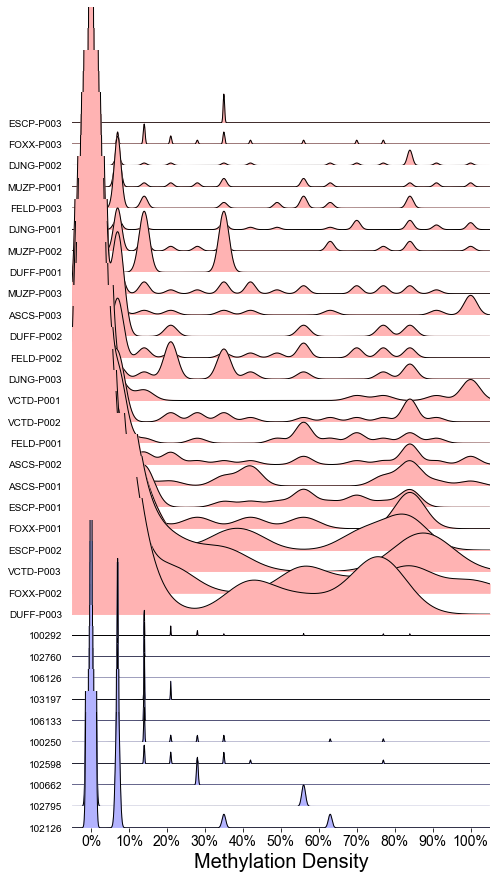

In [177]:
%matplotlib inline

#fig, axes = joypy.joyplot(hist_dt, ylim='own', overlap=0, hist=True, bins=12)
# fig, axes = joypy.joyplot(hist_dt.iloc[:, :26], overlap=0, figsize=(
#     7, 7), hist=True, bins=12, align='mid')

case_colors = [lighten_color('red')] * len(hist_dt.iloc[:, :24].columns)
control_colors = [lighten_color('blue')] * len(hist_dt.iloc[:, 26:].columns)
colors = case_colors + control_colors

case_linecolors = [(1, 0, 0)] * len(hist_dt.iloc[:, :24].columns)
control_linecolors = [(0, 0, 1)] * len(hist_dt.iloc[:, 26:].columns)
linecolors = case_linecolors + control_linecolors

n_bins = len(hist_dt.columns)

cmp = LinearSegmentedColormap.from_list(
    'faces', colors, N=n_bins)
cmpLines = LinearSegmentedColormap.from_list(
    'lines', linecolors, N=n_bins)


# fig, axes = joypy.joyplot(hist_dt.iloc[:, :24], kind="kde",
#                           range_style='all', x_range=[-0.05, 1.05], ylim=(0,1),
#                           overlap=2, linewidth=1, figsize=(7, 12), colormap=cmp, linecolor='k')


# validation controls that do not have any methylated epialleles. Messes up kde funtion b/c variance = 0 (all values are 0)
df1 = hist_dt.drop(['100442', '102199'], axis=1)

fig, axes = joypy.joyplot(df1.iloc[:, :], kind="kde",
                          range_style='all', x_range=[-0.05, 1.05], ylim=(0, 1),
                          overlap=2, linewidth=1, figsize=(7, 12), colormap=cmp, linecolor='k')


axes[-1].set_xticks(xtick_pos)
axes[-1].set_xticklabels(['0%'] + [str(int(round(md*100, 0))) +
                                   '%' for md in xtick_pos[1:]], fontsize=14)
axes[-1].set_xlabel('Methylation Density', fontsize=20)

In [178]:
fig.savefig('validation_set_ridge_kde.png', bbox_inches='tight', pad_inches=0.5, dpi=600)